# How Do We Design a Good Online Course for Business Analytics
***
## 1. Introduction

### Background

Websites for a massive open online course (MOOC), such as Udacity, Udemy, and Coursera, provide learners a low-cost, highly efficient way to acquire knowledge. Business analytics, which relies mainly on computer coding, is a popular topic in MOOC websites. Considering the impact of the COVID-19 pandemic on online learning and the job market where plenty of job openings on business analytics, we can foresee that the demand for business analytics online courses will continuously rise. 

In this blog, we aim to discover the secrete of designing an excellent online course for business analytics. We study the business analytics courses on the MOOC website, Udemy. Compared with MOOC websites like Udacity and Coursera, Udemy has many courses because it allows everyone to upload courses. The cost of learning Udemy courses is low as Udemy gives the $10 per course promotion regularly. 

### Objective

In this project, we web scrap data of business analytics courses from Udemy and analyze to find insight on designing a good online course for business analytics. 

### Business Questions

* What are the features of Business Analytics online course?
* How are the course content introduced?
* How are the instructor introduced?
* What are the factors impacting the enrollments of the Business Analytics online course?

### Dataset
We use the package Selenium with Python to perform web scraping on the Udemy website.  The list of 1005 courses is obtained from Udemy's webpage for Business Analytics & Intelligence Courses. The information, such as enrollment number, course rating, and course description, is scrapped on each course's web page. 

* The preprosess of the non-text data is implemented in notebook ***ETL/ETL_nonText.ipynb***. 
* The preprosess of the text data is implemented in notebook ***ETL/ETL_Text.ipynb***. 

### Evaluation Metrics
We set the enrollment number as the depedent variable and use other variables to predict the enrollment number. 

We define the Root Mean Squared Logarithmic Error (RMSLE) as the evaluation metrics. 

$RMSLE=\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{{{(\log ({{p}_{i}}+1)-\log ({{a}_{i}}+1))}^{2}}}}$
* $n$: number of sample courses
* ${p}_{i}$: the prediction of the enrollment number of the $i$ course.
* ${a}_{i}$: the actural value of the enrollment number of the $i$ course.


## 2. Load Dataset

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
%matplotlib inline

* The data is preprocessed in ***ETL/ETL_nonText.ipynb*** and ***ETL/ETL_Text.ipynb***.  

In [2]:
pd.options.display.max_columns = None
data = pd.read_pickle("../ETL/data_final.pkl")
data.head()

,price,original_price,lectures,hours,level,enrollment,rating,num_ratings,five_stars,four_stars,three_stars,two_stars,downloadable_resources,instructor_no_courses,descr_LDA_0,descr_LDA_1,descr_LDA_2,descr_LDA_3,descr_LDA_4,descr_LDA_5,descr_LDA_6,descr_LDA_7,descr_LDA_8,descr_LDA_9,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
0,25.99,179.99,83,9.0,All Levels,342288.0,4.7,91772.0,0.60,0.33,0.06,0.01,14.0,31.0,0.034318,0.950584,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.140185,0.703021,0.073783,0.071684,0.0,0.0,0.0,0.0,0.0,0.0
1,16.99,124.99,82,9.0,All Levels,231631.0,4.6,61533.0,0.60,0.33,0.06,0.01,6.0,48.0,0.078587,0.907617,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.943746,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,12.99,94.99,275,23.5,Beginner,148077.0,4.6,43339.0,0.54,0.38,0.07,0.01,26.0,35.0,0.986360,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.130506,0.834705,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,19.99,139.99,117,11.0,All Levels,109303.0,4.6,30899.0,0.61,0.33,0.06,0.01,14.0,3.0,0.036034,0.180143,0.774481,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.233460,0.740728,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,12.99,94.99,413,20.5,All Levels,136869.0,4.5,28595.0,0.52,0.37,0.10,0.01,151.0,68.0,0.436678,0.136041,0.194326,0.224129,0.0,0.0,0.0,0.0,0.0,0.0,0.978047,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.describe()


,price,original_price,lectures,hours,enrollment,rating,num_ratings,five_stars,four_stars,three_stars,two_stars,downloadable_resources,instructor_no_courses,descr_LDA_0,descr_LDA_1,descr_LDA_2,descr_LDA_3,descr_LDA_4,descr_LDA_5,descr_LDA_6,descr_LDA_7,descr_LDA_8,descr_LDA_9,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,15.971403,66.950507,52.036816,5.485572,5784.926368,4.071940,805.666667,0.420139,0.308716,0.138448,0.038736,7.475622,102.334328,0.518564,0.313582,0.095021,0.018787,0.006306,0.004120,0.003920,0.021706,0.002288,0.003109,0.726618,0.141167,0.041422,0.019147,0.007411,0.005788,0.006010,0.005528,0.010371,0.006542
std,17.074501,38.322610,50.944052,5.888027,21278.709134,0.849577,4410.404111,0.203599,0.159422,0.116401,0.072657,14.553126,339.187340,0.365521,0.313047,0.193330,0.085440,0.048661,0.036304,0.039994,0.109733,0.016074,0.029978,0.336015,0.235873,0.116980,0.086771,0.046049,0.033199,0.032669,0.026474,0.059923,0.036541
min,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.990000,24.990000,22.000000,2.000000,101.000000,3.900000,17.000000,0.320000,0.250000,0.070000,0.000000,1.000000,2.000000,0.160904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.439308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.990000,79.990000,37.000000,3.500000,663.000000,4.300000,64.000000,0.440000,0.330000,0.120000,0.020000,3.000000,7.000000,0.482334,0.220140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.957128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.990000,94.990000,64.000000,6.500000,3145.000000,4.500000,277.000000,0.540000,0.390000,0.190000,0.050000,8.000000,24.000000,0.967842,0.558224,0.066409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969991,0.214471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199.990000,199.990000,525.000000,67.500000,342288.000000,5.000000,91772.000000,1.000000,1.000000,1.000000,1.000000,154.000000,1420.000000,0.995311,0.977247,0.915600,0.871914,0.819914,0.774944,0.819959,0.887470,0.423173,0.699913,0.992436,0.935048,0.773070,0.887480,0.871393,0.849961,0.628528,0.549750,0.549992,0.819829


***
Comment:
* In the dataset, several varaible is highly screwed. 
* The enrollment numbers has the maximum 342288, mean 5785, and standard deviation 21279. The 75% enrollment number is 3145, implying that most courses have enrollment numbers between 0 and 4000.
* Because Udemy regularly has the $10 per course promotion, the price variable does not have a significant variance. Meanwhile, the original price variable has a big variance with the maximum 199.99, the mean 15.97, and the standard deviation of 17.07. 
* Hence, we need to perform a data exploration and feature transformation. 

***

## 3. Data Exploration

### Enrollment

Text(0.5, 0, 'Enrolloment')

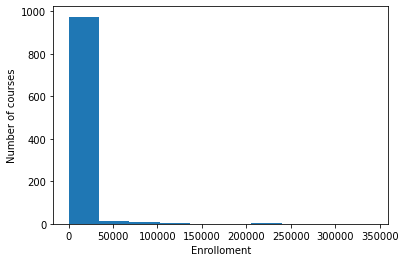

In [4]:
plt.hist(data["enrollment"],  bins=10)
plt.ylabel("Number of courses")
plt.xlabel('Enrolloment')

***
* As the dependent variable, the enrollment variable should be close to normal distributin. 
* Hence, a log-transform is performed. As shown in the plot, the log-transformed enrollment variable is close to normal distribution. 
***

Text(0.5, 0, 'Enrollments (Log-transformed)')

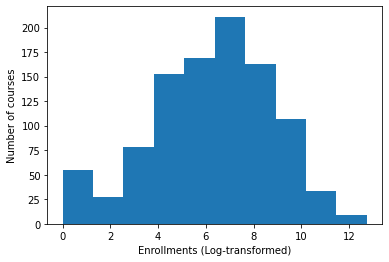

In [5]:
data["enrollment"] = data["enrollment"].apply(lambda x: np.log(x+1))
plt.hist(data["enrollment"], bins=10)
plt.ylabel('Number of courses')
plt.xlabel('Enrollments (Log-transformed)')

### Price

(array([959.,  19.,   8.,   3.,   8.,   0.,   2.,   1.,   1.,   4.]),
 array([  0.   ,  19.999,  39.998,  59.997,  79.996,  99.995, 119.994,
        139.993, 159.992, 179.991, 199.99 ]),
 <BarContainer object of 10 artists>)

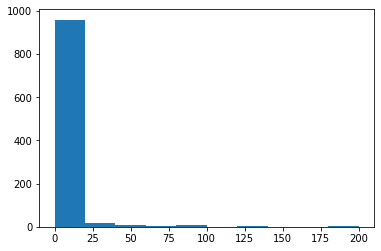

In [6]:
plt.hist(data["price"],  bins=10)

***
* As one of the independent variable, the price variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled price variable is less skewed. 
***

(array([ 31.,   0.,   0.,   0., 687., 244.,  14.,  11.,  10.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

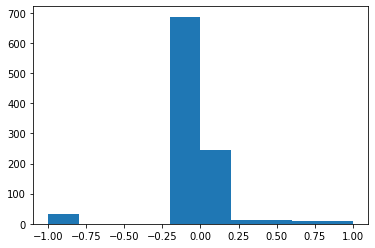

In [7]:
data["price"] = data["price"].apply(lambda x: np.log(x+1))
data["price"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["price"].values.reshape(-1,1))
plt.hist(data["price"], bins=10)

### Original_price

(array([211., 143., 105.,  51., 375.,  73.,  37.,   4.,   2.,   4.]),
 array([  0.   ,  19.999,  39.998,  59.997,  79.996,  99.995, 119.994,
        139.993, 159.992, 179.991, 199.99 ]),
 <BarContainer object of 10 artists>)

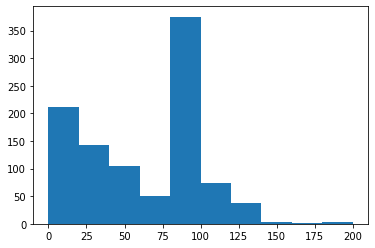

In [8]:
plt.hist(data["original_price"],  bins=10)

***
* As one of the independent variable, the original_price variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled original_price variable is less skewed. 
***

(array([ 31.,   0.,   0.,   0., 687., 244.,  14.,  11.,  10.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

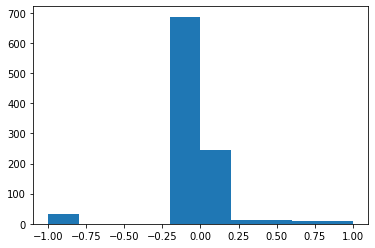

In [9]:
# data["original_price"] = data["original_price"].apply(lambda x: np.log(x+1))
data["original_price"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["original_price"].values.reshape(-1,1))
plt.hist(data["price"], bins=10)

### lectures

(array([701., 213.,  56.,  16.,   8.,   6.,   1.,   2.,   1.,   1.]),
 array([  5.,  57., 109., 161., 213., 265., 317., 369., 421., 473., 525.]),
 <BarContainer object of 10 artists>)

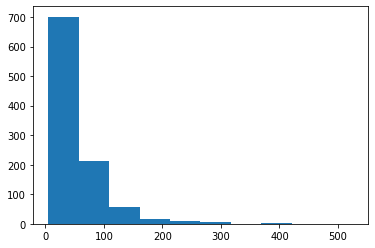

In [10]:
plt.hist(data["lectures"],  bins=10)

***
* As one of the independent variable, the lectures variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled lectures variable is close to normal distribution. 
***

(array([ 31.,  73., 138., 211., 243., 160.,  95.,  35.,  14.,   5.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

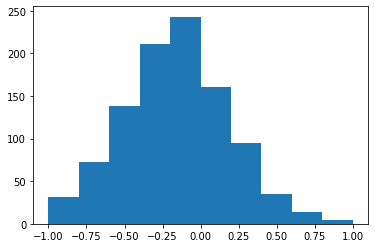

In [11]:
data["lectures"] = data["lectures"].apply(lambda x: np.log(x+1))
data["lectures"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["lectures"].values.reshape(-1,1))
plt.hist(data["lectures"], bins=10)


## hours

(array([802., 135.,  45.,  10.,   6.,   4.,   1.,   1.,   0.,   1.]),
 array([ 1.  ,  7.65, 14.3 , 20.95, 27.6 , 34.25, 40.9 , 47.55, 54.2 ,
        60.85, 67.5 ]),
 <BarContainer object of 10 artists>)

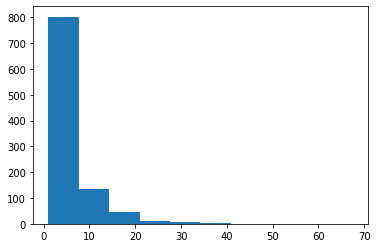

In [12]:
plt.hist(data["hours"],  bins=10)

***
* As one of the independent variable, the hours variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled hours variable is less skewed. 
***

(array([193., 266., 156., 164., 115.,  55.,  37.,  12.,   5.,   2.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -1.11022302e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

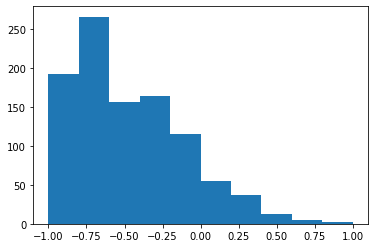

In [13]:
data["hours"] = data["hours"].apply(lambda x: np.log(x+1))
data["hours"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["hours"].values.reshape(-1,1))
plt.hist(data["hours"], bins=10)

### rating

(array([ 30.,   0.,   0.,   3.,   2.,  18.,  43., 172., 417., 320.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

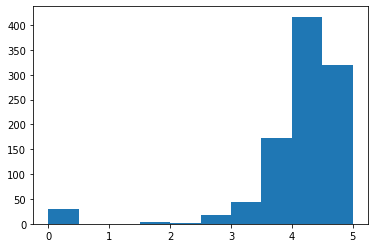

In [14]:
plt.hist(data["rating"],  bins=10)

***
* As one of the independent variable, the rating variable should be close to normal distributin. 
* Hence, a scaling is performed. As shown in the plot, the log-transformed and scaled rating variable is less skewed. 
***

(array([ 30.,   0.,   0.,   3.,   2.,  18.,  43., 172., 417., 320.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

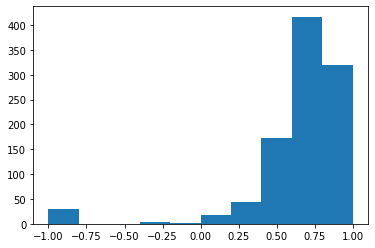

In [15]:
# data["rating"] = data["rating"].apply(lambda x: np.log(x+1))
data["rating"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["rating"].values.reshape(-1,1))
plt.hist(data["rating"], bins=10)

### downloadable_resources

(array([877.,  78.,  31.,   7.,   2.,   2.,   4.,   0.,   2.,   2.]),
 array([  0. ,  15.4,  30.8,  46.2,  61.6,  77. ,  92.4, 107.8, 123.2,
        138.6, 154. ]),
 <BarContainer object of 10 artists>)

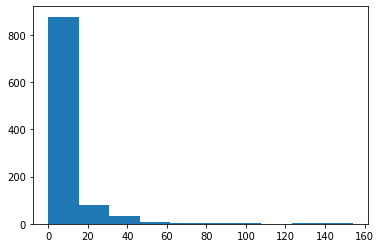

In [16]:
plt.hist(data["downloadable_resources"],  bins=10)

***
* As one of the independent variable, the downloadable_resources variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled downloadable_resources variable is less skewed. 
***

(array([155., 231., 179., 147., 102.,  94.,  61.,  24.,   4.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

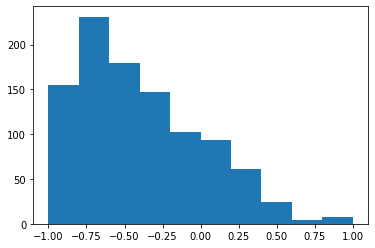

In [17]:
data["downloadable_resources"] = data["downloadable_resources"].apply(lambda x: np.log(x+1))
data["downloadable_resources"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["downloadable_resources"].values.reshape(-1,1))
plt.hist(data["downloadable_resources"], bins=10)

### instructor_no_courses

(array([937.,   1.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([   0.,  142.,  284.,  426.,  568.,  710.,  852.,  994., 1136.,
        1278., 1420.]),
 <BarContainer object of 10 artists>)

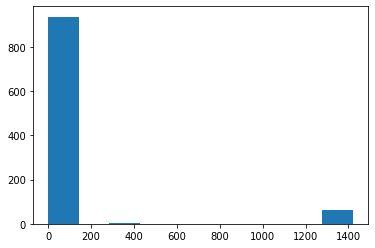

In [18]:
plt.hist(data["instructor_no_courses"],  bins=10)

***
* As one of the independent variable, the instructor_no_courses variable should be close to normal distributin. 
* Hence, a log-transform and scaling are performed. As shown in the plot, the log-transformed and scaled instructor_no_courses variable is less skewed. 
***

(array([192., 156., 188., 174., 117.,  93.,  17.,   6.,   0.,  62.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

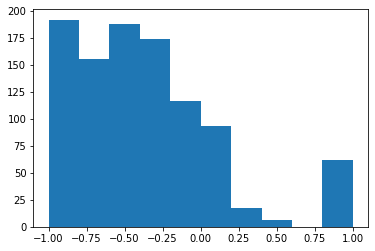

In [19]:
data["instructor_no_courses"] = data["instructor_no_courses"].apply(lambda x: np.log(x+1))
data["instructor_no_courses"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["instructor_no_courses"].values.reshape(-1,1))
plt.hist(data["instructor_no_courses"], bins=10)

## 4. Process categorical data


In [20]:
dummy = pd.get_dummies(data["level"])

In [21]:
data = pd.concat([data,dummy],axis = 1)
data.drop(["level"],axis = 1, inplace=True)


## 5. Regression Models

### The dependent variable and independent variables
* The enrollment number is set as the dependent variables, and other variables are set as independent. 
* We drop the num_ratings variable, because the rating number obviously follows the enrollment. We can not obtain useful information from the variable.   

In [22]:
y = data["enrollment"]
X = data.drop(["enrollment","num_ratings"],axis = 1)

### Split dataset
* The dataset is splitted into training and testing dataset for validating the prediction model.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### RMSLE

* We define a function to calculate Root Mean Squared Logarithmic Error (RMSLE)


In [24]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

### Ridge Regression

* Ridge regression model is to use linear least squares with l2 regularization.
* The model is to minimized the objective function, $||y - Xw||^2_2 + alpha * ||w||^2_2 $ 
* The Ridge regression is good for analyzing multiple regression data with multicollinearity. The multicollinearity is a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. It makes least squares estimates have large variances are large.


In [36]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.9, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=666, tol=0.00001)
model.fit(X_train, y_train)

Ridge(alpha=0.9, max_iter=1000, random_state=666, tol=1e-05)

In [37]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Ridge- RMSLE error on test dataset: "+str(v_rmsle))

Ridge- RMSLE error on test dataset: 2.021496763033342


***
* The hyperparameter of the Ridge regression is alpha.
* We use four values of alpha, 0.05, 0.1, 0.3, and 0.9. Among them, alpha of 0.9 gives the minimum RMSLE error on test dataset.
***

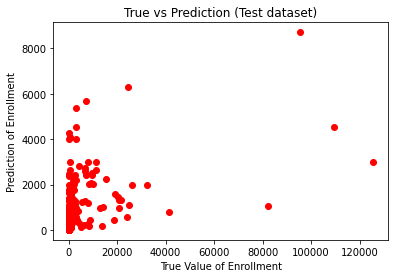

In [38]:
plt.scatter(y_true.values, y_pred, color = "red")
plt.title("True vs Prediction (Test dataset)")
plt.xlabel("True Value of Enrollment")
plt.ylabel("Prediction of Enrollment")
plt.show()

### Lasso Regression

* Lasso regression model is to use linear least squares with l1 regularization.
* The model is to minimized the objective function, $(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1$ 
* Lasso regression analysis is a shrinkage and variable selection method. 
* Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure obtain the subset of predictors.

In [47]:
from sklearn.linear_model import Ridge, Lasso
model = Lasso(alpha=0.05, fit_intercept=True, max_iter=10000,
   normalize=False, precompute=False, random_state=666,
   selection='random', tol=0.00001)
model.fit(X_train, y_train)

Lasso(alpha=0.05, max_iter=10000, random_state=666, selection='random',
      tol=1e-05)

In [48]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Lasso- RMSLE error on test dataset: "+str(v_rmsle))

Lasso- RMSLE error on test dataset: 2.06452758703387


***
* The hyperparameter of the Lasso regression is alpha.
* We use four values of alpha, 0.05, 0.1, 0.3, and 0.9. Among them, alpha of 0.05 gives the minimum RMSLE error on test dataset.
***

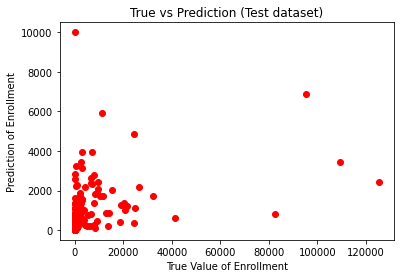

In [49]:
plt.scatter(y_true.values, y_pred, color = "red")
plt.title("True vs Prediction (Test dataset)")
plt.xlabel("True Value of Enrollment")
plt.ylabel("Prediction of Enrollment")
plt.show()

### Decision Tree Regression

* Decision Tree model is to predicts the value of a target variable by learning simple decision rules inferred from the data features.
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [59]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Decision Tree Regression- RMSLE error on test dataset: "+str(v_rmsle))

Decision Tree Regression- RMSLE error on test dataset: 1.5875228458514539


***
* The hyperparameter of the decision tree regression is max_depth.
* We use four values of max_depth, 2, 4, 6, and 8. Among them, max_depth of 4 gives the minimum RMSLE error on test dataset.
***

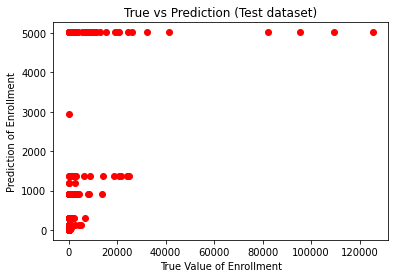

In [60]:
plt.scatter(y_true.values, y_pred, color = "red")
plt.title("True vs Prediction (Test dataset)")
plt.xlabel("True Value of Enrollment")
plt.ylabel("Prediction of Enrollment")
plt.show()

* Plot feature importance

In [61]:
for feature, importance in zip(X.columns,model.feature_importances_):
    print(feature, importance)

price 0.0
original_price 0.0
lectures 0.02914103102085937
hours 0.0
rating 0.0
five_stars 0.06699101518945215
four_stars 0.006111870442173789
three_stars 0.6356907963109857
two_stars 0.22888016127690103
downloadable_resources 0.0055633764925381015
instructor_no_courses 0.00483408015008962
descr_LDA_0 0.0
descr_LDA_1 0.00012595410699399614
descr_LDA_2 0.001318428927052887
descr_LDA_3 0.0
descr_LDA_4 0.0
descr_LDA_5 0.0
descr_LDA_6 0.0
descr_LDA_7 0.0
descr_LDA_8 0.0
descr_LDA_9 0.0
instr_LDA_0 0.01711448827730642
instr_LDA_1 0.0
instr_LDA_2 0.0
instr_LDA_3 0.0
instr_LDA_4 0.0
instr_LDA_5 0.0
instr_LDA_6 0.0
instr_LDA_7 0.0
instr_LDA_8 0.004228797805646816
instr_LDA_9 0.0
All Levels 0.0
Beginner 0.0
Expert 0.0
Intermediate 0.0


***
Model Comparision
* Among the three regressions used in this study, the decision tree regression model shows the highest accuracy.
* The three regreesion models are provided by the python package Scikit-learn. They are easy to use but can not indicate significant values of independent variables. 
* The decision tree regression model in Scikit-learn shows the feature importance of each independent variables. However, it can not show how the independent variable impact the dependent variable, such as positive or negative impact.  

Feature importance
* The variables that have importance in the regression are lectures, five_stars, four_stars, three_stars, two stars, downloadable_resources, instructor_no_courses, descr_LDA_1, descr_LDA_2, instr_LDA_0, and instr_LDA_8.
* Key words of descr_LDA 1: curso, power, bi, descript, requir, show, dato, aprend, b, sico
* Key words of descr_LDA 2: report, sql, pentaho, power, json, bi, postgr, use, server, gi
* Key words of instr_LDA_0: scienc, cours, univers, show, market, technolog, analyt, experi, team, year
* Key words of instr_LDA_8: jeff, year, step, program, technolog, workforc, industri, null, analyt, time
* The above four topics can be interpreted as: power bi and visulization, project report involving sql, instructor in university, and many years of experience of instructor.
***

### OLS Regression

* Here we use ordinary least squares (OLS) model to check the impacts of independent variables on the dependent variable (enrollment number).
* The OLS model is one of the simplest regression model, but is good to exame the correlation between independent variable and dependent variable. 
* In the use of OLS model, we don't care about the acuracy of the prediction model. Hence, we don't split the dataset into train and test for validation, but use the whole dataset to fit the model. 

In [62]:
import statsmodels.api as sm

In [63]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [64]:
print(fii.summary())

                                 OLS Regression Results                                
Dep. Variable:             enrollment   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              302.8
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        12:27:33   Log-Likelihood:                         -2100.1
No. Observations:                1005   AIC:                                      4270.
Df Residuals:                     970   BIC:                                      4442.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

***
* The variables, including original_price, lectures, five_stars, four_stars, three_stars, two stars, and downloadable_resources, show significant impact on the dependent variable.
* The significant variables are partially different from the important variables in the decision tree regression model.
* From the coefficients of the independent variables, the original_price, lectures, five_stars, four_stars, three_stars, two stars, and downloadable_resources all have positive impact on the enrollment number.
***



## 6. Discussion

Through the above analysis, we try to achieve guidelines on designing a bussiness analytics online course. 

### Original Price
* Udemy has regularly \$10 per course promotion, so learners prefer to puchase course during the promotion instead of paying the original price. 
* The regression analysis shows that the original price has a positive impact on the enrolment number. 
* It can be explained that a high original price gives the learners an impression that this course is valuable. 
* Hence, we suggest the instructors set the course's original price as $199.99, which is the maximun value of the original price in the dataset. 

### Lecture numbers
* The lecture number has a positive impact on the enrollment number. 
* It can be explained that learner favor the course with a big number of short lectures. 
* The mean of course hours is 5 hours, and the mean of lecture number is 52. 
* Hence, we suggest the instructors set the lecture nubmer as round 100 and each lecture length as 3 minutes. 

### Downloadable Resources
* The number of Downloadable Resources has a positive impact on the enrollment number.
* Considering the distribution of Downloadable Resources in the dataset, in which the mean value is 7, we suggest the instructors provide around 15 downloadable resources in the course. 

### Course Description
* The analysis above shows that the two topics in course descripiton, power bi visulization and project report involving sql, have an impact on the enrollment number. 
* This implies that the visulization content such as power bi and tableau should be highlighted in the course description. Learners are looking for the visulization skills. 
* The course projects that are set close to real-world industrial projects involving SQL database and formal reporting strategies should also be highlighted in the course description. 

### Instructor Introduction
* The analysis above shows that the two topics in instructor introduction, instructor in university and many years of experience, have an impact on the enrollment number. 
* This implies that learners emphasize on the instructor's educational background and teaching and researching experience in University, which should be highlighted in the instructor introduction. Does the instructor have a CS or business advance degree? Does the instructor teaching or researching business analytics in University?
* The instructor's long-time experience in bussiness analytics should also be highlighted in the course description. How many year does the instructor involving business analytics? How many year does the instructor use Python, machine learning, SQL, or Tableau?



## 7. Conclusion

* This project analyzes data of Udemy bussiness analytics course. 
* The challenge of the project is to web scrap data from Udemy website. Popular websites including Udemy have anti-scraping techniques to detect web scrapping and block ip. We try different web scrapping tools and find Selenium being the best for anti-anti-scraping. The Selenium can simulate human behaviors of opening websites, waiting, and closing websites. 
* This project does not only create an accurate predictive model but also determine the impact of independent variables on the depependent variable. Hence, the results from the predictive can be explored for business insights. 

## 8. Future

* The dataset containing information of 1005 courses is small. Future study may include more course information. 
* Future study may be extended to other MOOC subject, such as machine learning and Artificial intelligence.
* This project uses OLS, Ridge, Lasso, and decision tree regression models. More advanced regression model can be used, such as General linear model, Bayesian methods, and nonlinear regression model. 
